### How to run this notebook

* Online with [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/joaquimrcarvalho/cipf-comtrade.git/main?labpath=comtrade-api.ipynb):
https://mybinder.org/v2/gh/joaquimrcarvalho/cipf-comtrade.git/main?labpath=comtrade-api.ipynb
* In your own machine: check https://github.com/joaquimrcarvalho/cipf-comtrade.git


# Teste da API UN Comtrade

> The UN COMTRADE is the largest depository of international trade data. It contains well over 5 billion data records since 1962 and is available publicly on the internet. In addition, it offers public and premium data API for easier integration/download.

Informação geral: https://unstats.un.org/wiki/display/comtrade/What+is+UN+Comtrade

API Site: https://comtradedeveloper.un.org 
API specs: https://comtradedeveloper.un.org/api-details#api=comtrade-v1&operation=get-get


Manual metodológico 
* alterações a partir de 2019: https://comtrade.un.org/data/MethodologyGuideforComtradePlus.pdf
* conceitos: https://unstats.un.org/unsd/trade/eg-imts/IMTS%202010%20(English).pdf

Codebook:
* https://unstats.un.org/wiki/display/comtrade/New+Comtrade+FAQ+for+First+Time+Users?preview=/125141443/135004360/ComtradePlus%20-%20data%20items%20-%2017%20Mar%202020.xlsx
* Documentação geral de códigos e categorias: https://unctadstat.unctad.org/EN/Classifications.html

Python package (low level calls):
* https://github.com/uncomtrade/comtradeapicall

Ver também:
* https://wits.worldbank.org/wits/wits/witshelp/Content/Data_Retrieval/T/Intro/B1.Working_with_Trade_Data.htm
* https://wits.worldbank.org/wits/wits/witshelp/Content/Data_Retrieval/T/Intro/B2.Imports_Exports_and_Mirror.htm

## Criar directoria de apoio 

In [1]:
from pathlib import Path

Path('support').mkdir(parents=True, exist_ok=True)
Path('downloads').mkdir(parents=True, exist_ok=True)

## Criar ficheiro de configuração se não existir

O ficheiro de configuração serve para armazenar
a APIKEY que dá acesso a mais de 500 linhas de
resultados.


In [2]:
import os

fname = 'config.ini'
content = """
# Ficheiro de configuração
[comtrade]
# Add API Key. DO NOT SHARE
key = APIKEYHERE
"""
if not os.path.isfile(fname):
  print("Criando ficheiro de configuração")
  with open(fname,'w') as f:
    f.write(content)


## Obter uma chave de acesso à API

Para aceder à UN Comtrade via API sem limites é necessário uma chave de acesso,
de outro modo os resultados são limitados a 500 linhas.

Para obter a chave de acsso:
* Registo em https://comtradedeveloper.un.org/
* Ir para _Products_ 
* Selecionar "Premium Individual APIs" (https://comtradedeveloper.un.org/product#product=dataapis)
* Escolher _Subscribe to "comtrade - v1"_  
* Esperar pelo email com a chave da API key (demora alguns dias
* Copia a chave para o local indicado no ficheiro `config.ini` antes
  de executar o resto do notebook.


In [3]:
import configparser
import comtrade

if os.path.isfile(fname):

    config = configparser.ConfigParser()
    config.read('config.ini')
    # get API Key or set to None    
    APIKEY = config['comtrade'].get('key', None)

comtrade.init(APIKEY, force_init=True)

contrade.py initialized


## Parâmetros para visualização

Definir as colunas a visualizar, ordem das linhas abaixo para simplificar
posterior visualização dos dados.

### Descrição das colunas 

In [4]:
import pandas as pd
# convert csv file to DataFrame
df = pd.read_csv("support/COMTRADE+ COMPLETE.csv",index_col=0)
print(df[['Description']].to_markdown())



| COMTRADE+ DATA ITEMS     | Description                                                                              |
|:-------------------------|:-----------------------------------------------------------------------------------------|
| datasetCode              | Combination of several keys to identify specific datasetCode                             |
| typeCode                 | Product type: Goods or Services                                                          |
| freqCode                 | The time interval at which observations occur                                            |
| refPeriodId              | The period of time to which the measured observation is intended to refer                |
| refYear                  | Year of observation                                                                      |
| refMonth                 | Month of observation. For annual, it would bet set to 52                                 |
| period                   | Combination

### Lista das colunas

In [5]:
cols_all = list(df[['Description']].index.values)
cols_basic = ['reporterCode','reporterDesc',
              'partnerCode','partnerDesc',  
              'partner2Code','partner2Desc',  
              'period','flowCode','flowDesc',
              'primaryValue']
sort_order = ['reporterDesc','partnerDesc','period']

In [20]:
cols_all

['datasetCode',
 'typeCode',
 'freqCode',
 'refPeriodId',
 'refYear',
 'refMonth',
 'period',
 'reporterCode',
 'reporterISO',
 'reporterDesc',
 'flowCategory',
 'flowCode',
 'flowDesc',
 'partnerCode',
 'partnerISO',
 'partnerDesc',
 'partner2Code',
 'partner2ISO',
 'partner2Desc',
 'classificationSearchCode',
 'classificationCode',
 'isOriginalClassification',
 'cmdCode',
 'cmdDesc',
 'aggrLevel',
 'isLeaf',
 'customsCode',
 'customsDesc',
 'mosCode',
 'mosDesc',
 'motCode',
 'motDesc',
 'qtyUnitCode',
 'qtyUnitAbbr',
 'qty',
 'isQtyEstimated',
 'altQtyUnitCode',
 'altQtyUnitAbbr',
 'altQty',
 'isAltQtyEstimated',
 'netWgt',
 'isnetWgtEstimated',
 'grossWgt',
 'isgrossWgtEstimated',
 'cifValue',
 'fobValue',
 'primaryValue',
 'legacyEstimationFlag',
 'isReported',
 'isAggregate']

## Cobertura dos dados: importações/exportações China-PLP anos disponíveis

In [13]:
import time
import comtrade


comtrade.init(APIKEY)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

flow = "M,X"

period = year_range()
for country_code in m49_plp:
    df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=m49_china,
                     partnerCode=country_code,
                     partner2Code=0,
                     period=period, # period None returns all the available period
                     apiKey=APIKEY,
                     timeout=30,
                     echo_url=False
                     )
    print(f"{m49_partner_codes_map[country_code]},  {df.refYear.unique().min()}-{df.refYear.unique().max()}")
    time.sleep(0.5)  # avoid stressing the UN server.


Angola,  1992-2021
Brazil,  1992-2021
Cape Verde,  1992-2021
Guinea-Bissau,  1992-2021
Equatorial Guinea,  1992-2021
Mozambique,  1992-2021
Portugal,  1992-2021
Sao Tome and Principe,  1992-2021
Timor-Leste,  2003-2021


## China e PLP: importações, exportações, volume, saldos

O Forum Macau inclui desde 2016 um quadro sumário
dos dados das trocas comerciais entre a China e 
os PLP. Ver https://www.forumchinaplp.org.mo/pt/publications-data-4/annual-reports/

Esses quadros fornecem o valor das exportações e importação e o 
volume de trocas (importações + exportações). Não calculam o saldo.

Aqui reproduzimos esses quadros a partir das
informações atualmente disponíveis no UN Comtrade,
para todo os anos para os quais existem dados, incluindo o saldo.

>NOTA: Tal como nos quadros do Forum os valores são
apresentados em 10 mil USD

In [14]:
import comtrade

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f} $10mil'.format

year_start = 1984
year_end = 2026
period = comtrade.year_range(year_start,year_end)
flow = "M,X"
partnerCode = m49_plp_list
df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=m49_china,
                     partnerCode=partnerCode,
                     cmdCode='TOTAL',
                     period=period,
                     apiKey=APIKEY,
                     timeout=30
                     )

temp=df.pivot(index=['refYear','partnerDesc',],columns='flowCode',values='primaryValue')
temp['C'] = temp['M'] + temp['X']
temp['S'] = temp['X']-temp['M']
forum_type = temp[['C','X','M','S']]
forum_type.columns=['Trocas','Exportações','Importações','Saldo']
forum_type.div(10000).fillna("-")


Trocas         Exportações  \
refYear partnerDesc                                                      
1992    Angola                     3,788.21 $10mil       847.28 $10mil   
        Brazil                    58,405.38 $10mil     6,475.17 $10mil   
        Cape Verde                               -        16.15 $10mil   
        Equatorial Guinea             26.09 $10mil        18.08 $10mil   
        Guinea-Bissau                            -       240.16 $10mil   
        Mozambique                 5,911.89 $10mil     2,072.90 $10mil   
        Portugal                   6,691.20 $10mil     4,399.26 $10mil   
        Sao Tome and Principe                    -         2.48 $10mil   
1993    Angola                    19,191.74 $10mil     1,120.69 $10mil   
        Brazil                   105,523.37 $10mil    19,216.62 $10mil   
        Cape Verde                               -        75.49 $10mil   
        Equatorial Guinea             66.34 $10mil        63.54 $10mil   
        Guinea-Bissau                376.75 $10mil       271.63 $10mil   
        Mozambique                 2,326.57 $10mil     1,654.82 $10mil   
        Portugal                  11,233.26 $10mil     7,392.87 $10mil   
        Sao Tome and Principe                    -        37.96 $10mil   
1994    Angola                     6,046.63 $10mil     1,248.20 $10mil   
        Brazil                   142,116.82 $10mil    36,239.09 $10mil   
        Cape Verde                               -        42.44 $10mil   
        Equatorial Guinea             68.25 $10mil        58.48 $10mil   
        Guinea-Bissau                491.43 $10mil       400.30 $10mil   
        Mozambique                 1,209.43 $10mil       651.82 $10mil   
        Portugal                   9,006.80 $10mil     7,451.75 $10mil   
        Sao Tome and Principe                    -        16.10 $10mil   
1995    Angola                    15,806.66 $10mil     2,115.93 $10mil   
        Brazil                   199,058.88 $10mil    75,905.87 $10mil   
        Cape Verde                               -        38.03 $10mil   
        Equatorial Guinea          1,496.36 $10mil       233.04 $10mil   
        Guinea-Bissau                109.41 $10mil       109.09 $10mil   
        Mozambique                 1,261.61 $10mil     1,152.31 $10mil   
        Portugal                  14,468.75 $10mil    10,605.39 $10mil   
        Sao Tome and Principe                    -        21.32 $10mil   
1996    Angola                    27,228.48 $10mil     2,853.37 $10mil   
        Brazil                   224,699.57 $10mil    76,293.05 $10mil   
        Cape Verde                               -        27.49 $10mil   
        Equatorial Guinea          2,157.18 $10mil       597.07 $10mil   
        Guinea-Bissau                            -        46.26 $10mil   
        Mozambique                 1,143.34 $10mil     1,123.52 $10mil   
        Portugal                  16,445.65 $10mil    13,379.79 $10mil   
        Sao Tome and Principe         25.67 $10mil        25.62 $10mil   
1997    Angola                    63,262.47 $10mil     2,912.85 $10mil   
        Brazil                   253,335.06 $10mil   104,438.93 $10mil   
        Cape Verde                               -        40.54 $10mil   
        Equatorial Guinea          8,082.29 $10mil       333.51 $10mil   
        Guinea-Bissau                176.09 $10mil        72.23 $10mil   
        Mozambique                 1,667.10 $10mil     1,594.12 $10mil   
        Portugal                  21,081.67 $10mil    16,614.98 $10mil   
        Sao Tome and Principe                    -        10.79 $10mil   
1998    Angola                    19,035.07 $10mil     3,665.30 $10mil   
        Brazil                   221,846.73 $10mil   108,536.40 $10mil   
        Cape Verde                               -       196.08 $10mil   
        Equatorial Guinea          7,184.51 $10mil       293.72 $10mil   
        Guinea-Bissau                           

### Gravar em Excel

In [15]:
real_period = forum_type.index.get_level_values('refYear')
start_year=min(real_period)
end_year=max(real_period)
period=f"{start_year}-{end_year}"
forum_type.to_excel(f"./downloads/quadros_forum_{period}.xlsx")
forum_type.div(10).to_excel(f"./downloads/quadros_forum_10_{period}.xlsx")
forum_type.div(10000).to_excel(f"./downloads/quadros_forum_10mil_{period}.xlsx")

## Gráficos dos valores das importações e exportações, trocas e saldos

### Gráficos das trocas comerciais (importações + exportações)

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Trocas' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento            Trocas                                   \
Parceiro             Angola             Brazil    Cape Verde   
refYear                                                        
1992          37,882,057.00     584,053,801.00           NaN   
1993         191,917,410.00   1,055,233,729.00           NaN   
1994          60,466,329.00   1,421,168,235.00           NaN   
1995         158,066,638.00   1,990,588,766.00           NaN   
1996         272,284,848.00   2,246,995,732.00           NaN   
1997         632,624,657.00   2,533,350,625.00           NaN   
1998         190,350,740.00   2,218,467,328.00           NaN   
1999         372,014,853.00   1,844,531,871.00           NaN   
2000       1,876,428,476.00   2,844,986,286.00           NaN   
2001         767,549,929.00   3,698,157,551.00           NaN   
2002       1,148,360,244.00   4,469,402,237.00  1,839,631.00   
2003       2,351,726,095.00   7,985,547,602.00  2,596,450.00   
2004       4,910,857,051.00  12,346,965,534.00           NaN   
2005       6,954,622,660.00  14,819,733,513.00           NaN   
2006      11,827,480,740.00  20,289,600,892.00 10,094,434.00   
2007      14,123,183,254.00  29,740,543,392.00 16,826,538.00   
2008      25,324,993,585.00  48,670,899,923.00           NaN   
2009      17,061,790,710.00  42,399,500,775.00 35,405,225.00   
2010      24,818,922,030.00  62,560,099,217.00 34,347,153.00   
2011      27,706,333,858.00  84,223,427,605.00 49,763,747.00   
2012      37,601,068,187.00  85,694,760,113.00 57,491,588.00   
2013      35,936,728,280.00  90,194,593,897.00 61,996,254.00   
2014      37,081,011,865.00  86,543,359,382.00 51,226,457.00   
2015      19,718,757,266.00  71,501,583,488.00 43,322,801.00   
2016      15,646,515,704.00  67,831,200,011.00 48,754,719.00   
2017      22,956,162,692.00  87,807,693,508.00 69,247,880.00   
2018      28,079,647,462.00 111,234,639,172.00 78,556,148.00   
2019      25,893,129,559.00 115,501,610,959.00 64,195,682.00   
2020      16,505,822,542.00 120,470,436,745.00 79,046,671.00   
2021      23,399,776,998.00 163,490,100,674.00 85,684,661.00   

Movimento                                                                    \
Parceiro  Equatorial Guinea Guinea-Bissau       Mozambique         Portugal   
refYear                                                                       
1992             260,869.00           NaN    59,118,852.00    66,912,040.00   
1993             663,395.00  3,767,504.00    23,265,735.00   112,332,647.00   
1994             682,523.00  4,914,303.00    12,094,253.00    90,068,016.00   
1995          14,963,606.00  1,094,106.00    12,616,064.00   144,687,454.00   
1996          21,571,812.00           NaN    11,433,431.00   164,456,527.00   
1997          80,822,873.00  1,760,864.00    16,671,022.00   210,816,704.00   
1998          71,845,073.00           NaN    13,761,286.00   227,541,780.00   
1999         169,599,635.00  3,376,647.00    22,230,406.00   258,231,893.00   
2000         323,027,036.00  4,803,101.00    33,483,844.00   307,772,721.00   
2001         511,935,551.00           NaN    33,234,945.00   332,028,165.00   
2002         386,013,778.00           NaN    48,510,137.00   383,585,176.00   
2003         416,934,554.00           NaN    71,620,107.00   600,870,201.00   
2004       1,006,774,432.00  6,023,555.00   119,440,424.00   869,155,651.00   
2005       1,456,635,405.00           NaN   165,005,198.00 1,235,786,772.00   
2006       2,578,699,652.00  5,677,120.00   207,712,591.00 1,713,473,333.00   
2007       1,790,074,148.00  7,481,817.00   287,801,009.00 2,219,394,424.00   
2008       2,545,262,786.00  7,389,560.00   421,877,323.00 2,704,592,097.00   
2009       1,413,495,293.00 24,810,827.00   516,688,179.00 2,404,446,058.00   
2010       1,054,898,266.00 13,296,570.00   697,468,565.00 3,267,743,710.00   
2011       1,939,264,554.00 18,963,628.00   957,488,225.00 3,963,497,677.00   
2012       2,184,237,487.00 22,528,109.00 1,344,207,513.00 4,015,739,5

/tmp/ipykernel_5598/519571918.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


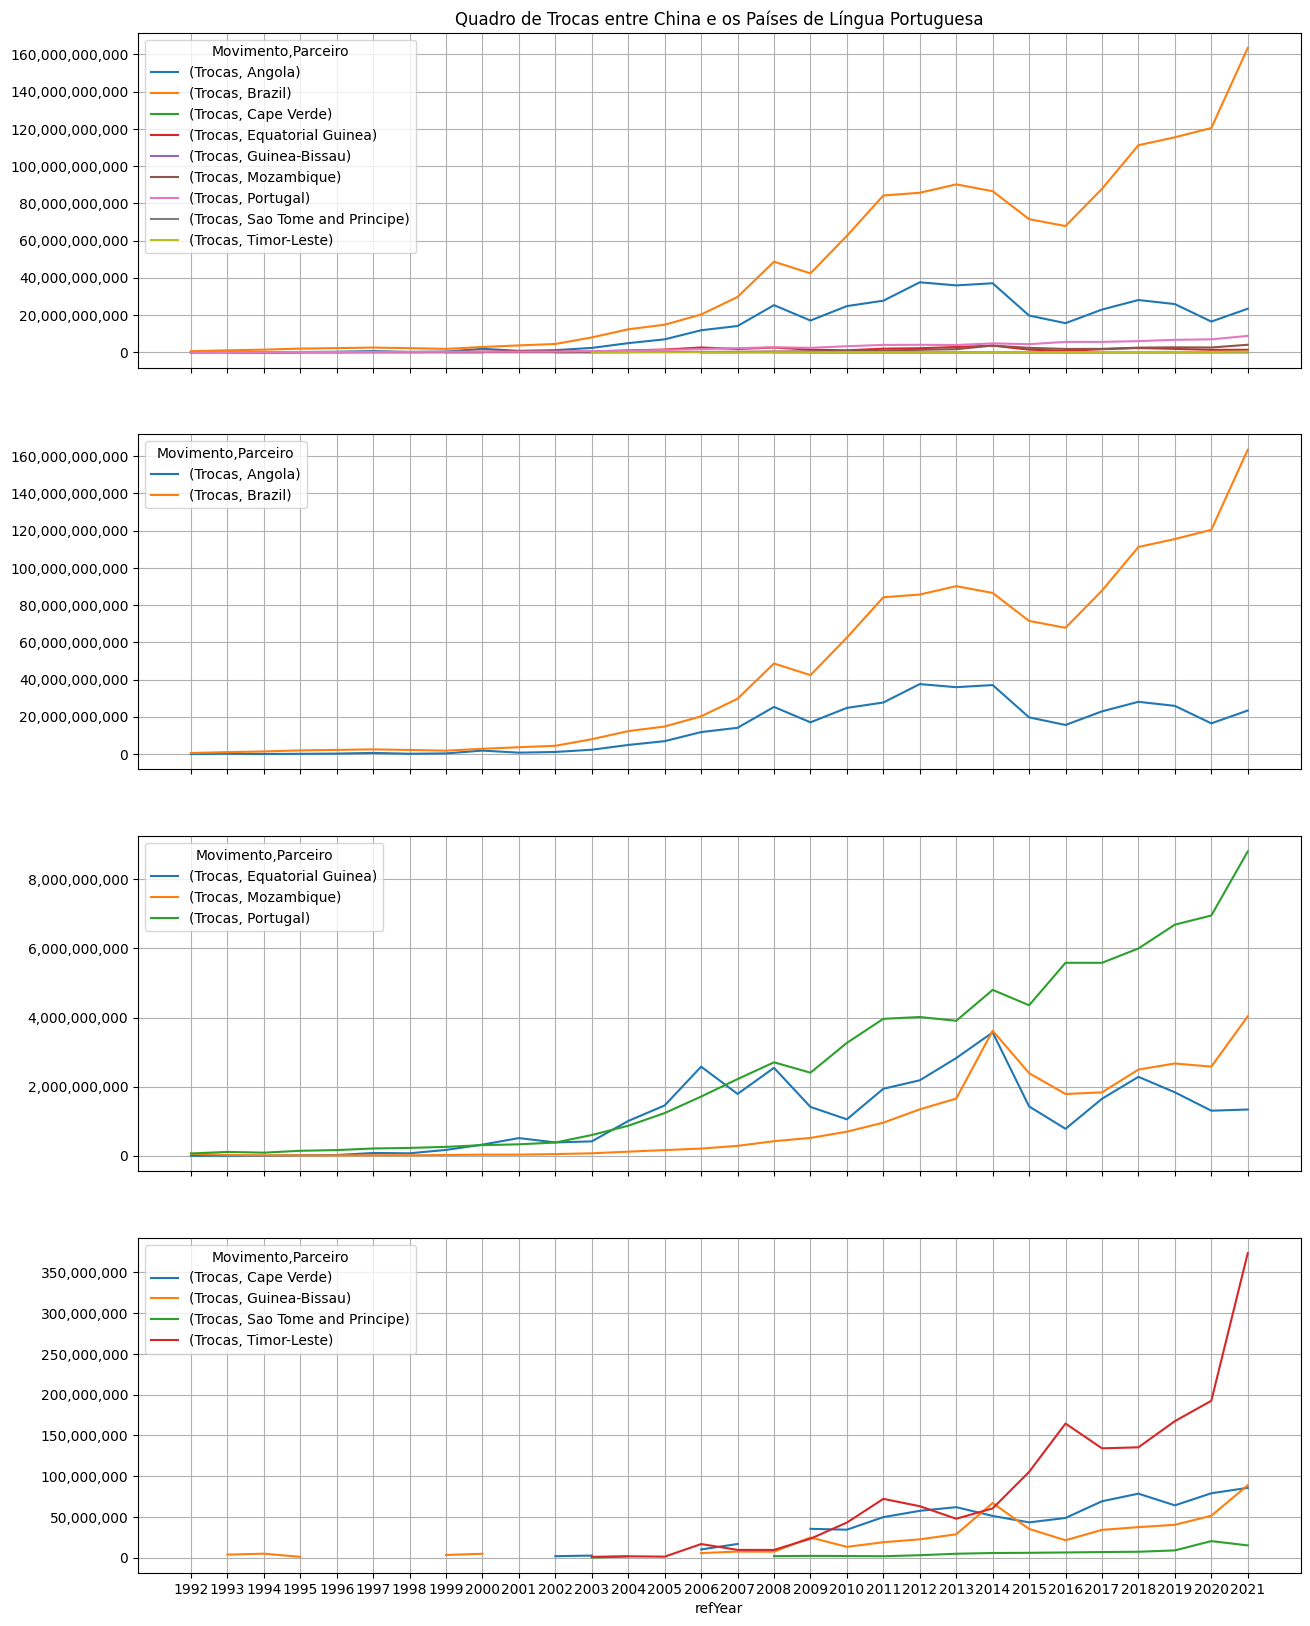

In [17]:
import matplotlib.pyplot as plt

title=f"Quadro de {movimento} entre {m49_reporter_codes_map[m49_china]} e os Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=True,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cape Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"downloads/cn_plp_{movimento}.png")

### Gráficos importações

In [18]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Importações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento       Importações                                                    \
Parceiro             Angola             Brazil   Cape Verde Equatorial Guinea   
refYear                                                                         
1992          29,409,207.00     519,302,066.00          NaN         80,044.00   
1993         180,710,462.00     863,067,513.00          NaN         28,001.00   
1994          47,984,324.00   1,058,777,325.00          NaN         97,694.00   
1995         136,907,302.00   1,231,530,073.00          NaN     12,633,236.00   
1996         243,751,143.00   1,484,065,187.00          NaN     15,601,149.00   
1997         603,496,146.00   1,488,961,327.00          NaN     77,487,760.00   
1998         153,697,712.00   1,133,103,360.00          NaN     68,907,888.00   
1999         355,651,156.00     968,529,665.00          NaN    167,101,673.00   
2000       1,842,692,967.00   1,621,440,791.00          NaN    319,477,975.00   
2001         721,828,095.00   2,347,232,533.00          NaN    508,580,964.00   
2002       1,087,049,343.00   3,003,019,897.00       262.00    382,726,097.00   
2003       2,205,934,880.00   5,842,291,688.00       353.00    411,886,532.00   
2004       4,717,339,146.00   8,672,861,322.00          NaN    996,649,809.00   
2005       6,581,828,714.00   9,992,524,117.00          NaN  1,437,833,974.00   
2006      10,933,295,107.00  12,909,495,161.00       344.00  2,537,591,664.00   
2007      12,888,664,603.00  18,342,070,986.00        50.00  1,697,283,346.00   
2008      22,382,523,829.00  29,863,442,631.00          NaN  2,267,871,882.00   
2009      14,675,830,702.00  28,280,982,512.00       193.00  1,055,071,473.00   
2010      22,815,049,454.00  38,099,447,351.00    12,060.00    598,657,025.00   
2011      24,922,180,492.00  52,386,750,280.00    12,062.00  1,672,947,440.00   
2012      33,561,896,917.00  52,281,126,771.00     1,115.00  1,822,803,333.00   
2013      31,972,669,347.00  54,299,122,653.00       160.00  2,469,917,950.00   
2014      31,106,015,046.00  51,653,224,893.00     3,020.00  3,217,190,248.00   
2015      16,001,611,383.00  44,089,358,062.00    22,606.00  1,166,496,464.00   
2016      13,966,117,080.00  45,855,047,246.00    83,281.00    631,851,506.00   
2017      20,698,709,467.00  58,857,155,273.00     8,010.00  1,483,835,026.00   
2018      25,826,510,355.00  77,569,499,985.00   290,397.00  2,139,372,096.00   
2019      23,837,402,142.00  79,962,547,047.00    28,691.00  1,723,064,057.00   
2020      14,757,730,338.00  85,517,209,220.00 1,209,992.00  1,182,549,225.00   
2021      20,908,231,317.00 109,877,876,281.00 1,146,922.00  1,215,142,465.00   

Movimento                                                  \
Parceiro  Guinea-Bissau       Mozambique         Portugal   
refYear                                                     
1992                NaN    38,389,843.00    22,919,478.00   
1993       1,051,163.00     6,717,531.00    38,403,953.00   
1994         911,339.00     5,576,033.00    15,550,507.00   
1995           3,214.00     1,092,985.00    38,633,592.00   
1996                NaN       198,206.00    30,658,597.00   
1997       1,038,609.00       729,796.00    44,666,900.00   
1998                NaN       427,301.00    26,952,180.00   
1999         195,510.00     3,299,368.00    38,288,657.00   
2000         181,700.00     8,777,791.00    46,949,131.00   
2001                NaN    11,193,891.00    71,460,151.00   
2002                NaN    22,578,190.00    82,705,528.00   
2003                NaN    26,591,793.00   194,613,740.00   
2004          29,251.00    44,286,108.00   280,896,511.00   
2005                NaN    73,527,324.00   323,834,266.00   
2006              64.00    79,772,228.00   353,809,128.00   
2007         172,994.00   124,248,069.00   384,642,280.00   
2008       1,242,562.00   125,882,374.00   387,489,834.00   
2009       1,617,183.00   177,554,369.00   480,929,852.00   
2010       3,862,870.00   201,077,529.00   75

/tmp/ipykernel_5598/767447397.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


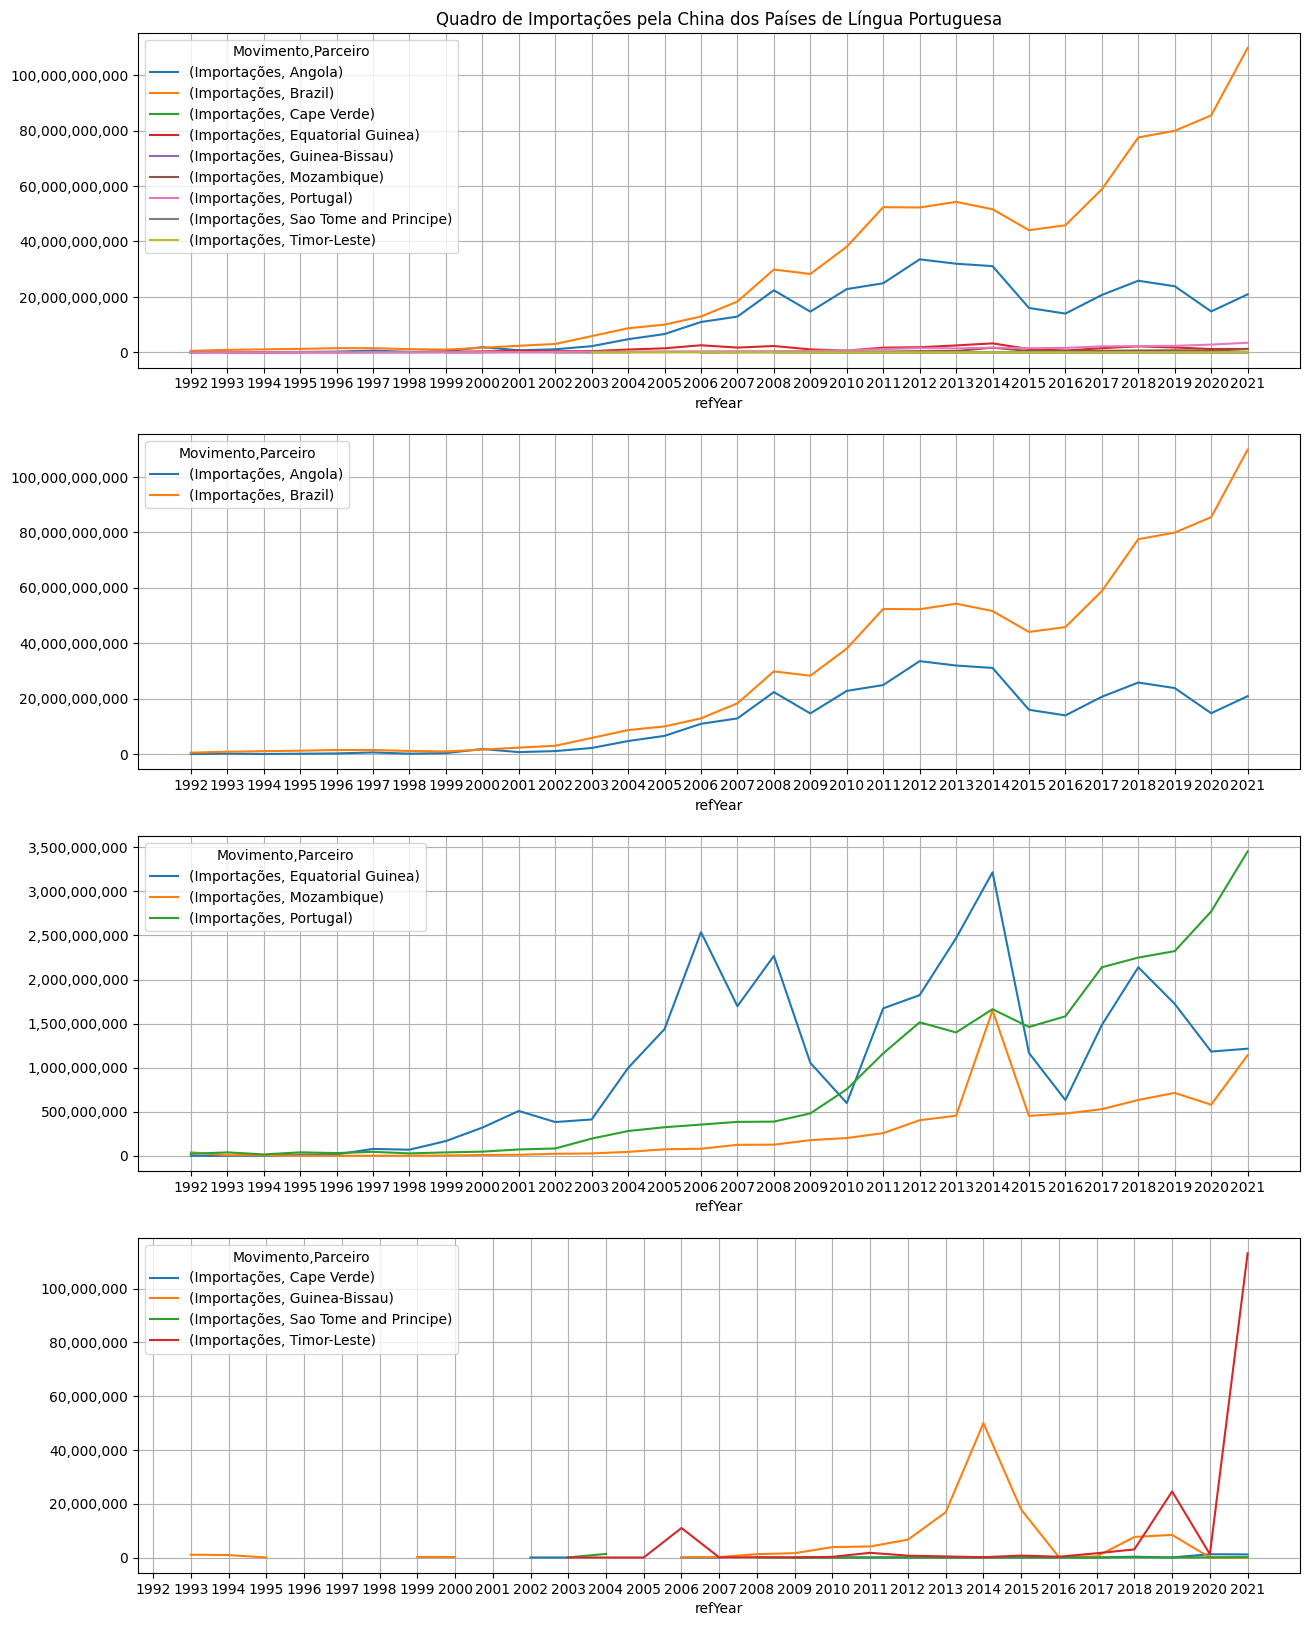

In [19]:
title=f"Quadro de {movimento} pela {m49_reporter_codes_map[m49_china]} dos Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cape Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"downloads/cn_plp_{movimento}.png")

### Gráficos exportações

In [20]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Exportações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento      Exportações                                                    \
Parceiro            Angola            Brazil    Cape Verde Equatorial Guinea   
refYear                                                                        
1992          8,472,850.00     64,751,735.00    161,485.00        180,825.00   
1993         11,206,948.00    192,166,216.00    754,935.00        635,394.00   
1994         12,482,005.00    362,390,910.00    424,394.00        584,829.00   
1995         21,159,336.00    759,058,693.00    380,342.00      2,330,370.00   
1996         28,533,705.00    762,930,545.00    274,927.00      5,970,663.00   
1997         29,128,511.00  1,044,389,298.00    405,394.00      3,335,113.00   
1998         36,653,028.00  1,085,363,968.00  1,960,845.00      2,937,185.00   
1999         16,363,697.00    876,002,206.00  3,141,087.00      2,497,962.00   
2000         33,735,509.00  1,223,545,495.00  5,178,211.00      3,549,061.00   
2001         45,721,834.00  1,350,925,018.00  2,212,932.00      3,354,587.00   
2002         61,310,901.00  1,466,382,340.00  1,839,369.00      3,287,681.00   
2003        145,791,215.00  2,143,255,914.00  2,596,097.00      5,048,022.00   
2004        193,517,905.00  3,674,104,212.00  2,746,211.00     10,124,623.00   
2005        372,793,946.00  4,827,209,396.00  5,187,788.00     18,801,431.00   
2006        894,185,633.00  7,380,105,731.00 10,094,090.00     41,107,988.00   
2007      1,234,518,651.00 11,398,472,406.00 16,826,488.00     92,790,802.00   
2008      2,942,469,756.00 18,807,457,292.00 14,953,954.00    277,390,904.00   
2009      2,385,960,008.00 14,118,518,263.00 35,405,032.00    358,423,820.00   
2010      2,003,872,576.00 24,460,651,866.00 34,335,093.00    456,241,241.00   
2011      2,784,153,366.00 31,836,677,325.00 49,751,685.00    266,317,114.00   
2012      4,039,171,270.00 33,413,633,342.00 57,490,473.00    361,434,154.00   
2013      3,964,058,933.00 35,895,471,244.00 61,996,094.00    357,517,241.00   
2014      5,974,996,819.00 34,890,134,489.00 51,223,437.00    352,515,328.00   
2015      3,717,145,883.00 27,412,225,426.00 43,300,195.00    261,389,919.00   
2016      1,680,398,624.00 21,976,152,765.00 48,671,438.00    148,253,831.00   
2017      2,257,453,225.00 28,950,538,235.00 69,239,870.00    166,217,956.00   
2018      2,253,137,107.00 33,665,139,187.00 78,265,751.00    145,146,401.00   
2019      2,055,727,417.00 35,539,063,912.00 64,166,991.00    113,204,451.00   
2020      1,748,092,204.00 34,953,227,525.00 77,836,679.00    122,120,216.00   
2021      2,491,545,681.00 53,612,224,393.00 84,537,739.00    123,984,094.00   

Movimento                                                  \
Parceiro  Guinea-Bissau       Mozambique         Portugal   
refYear                                                     
1992       2,401,586.00    20,729,009.00    43,992,562.00   
1993       2,716,341.00    16,548,204.00    73,928,694.00   
1994       4,002,964.00     6,518,220.00    74,517,509.00   
1995       1,090,892.00    11,523,079.00   106,053,862.00   
1996         462,599.00    11,235,225.00   133,797,930.00   
1997         722,255.00    15,941,226.00   166,149,804.00   
1998       1,452,681.00    13,333,985.00   200,589,600.00   
1999       3,181,137.00    18,931,038.00   219,943,236.00   
2000       4,621,401.00    24,706,053.00   260,823,590.00   
2001       8,299,380.00    22,041,054.00   260,568,014.00   
2002       4,503,979.00    25,931,947.00   300,879,648.00   
2003      12,350,232.00    45,028,314.00   406,256,461.00   
2004       5,994,304.00    75,154,316.00   588,259,140.00   
2005       5,793,889.00    91,477,874.00   911,952,506.00   
2006       5,677,056.00   127,940,363.00 1,359,664,205.00   
2007       7,308,823.00   163,552,940.00 1,834,752,144.00   
2008       6,146,998.00   295,994,949.00 2,317,102,263.00   
2009      23,193,644.00   339,133,810.00 1,923,516,206.00   
2010       9,433,700.00   496,391,036.00 2,513,317,692.00   
2011      14,850,

/tmp/ipykernel_5598/2654473426.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


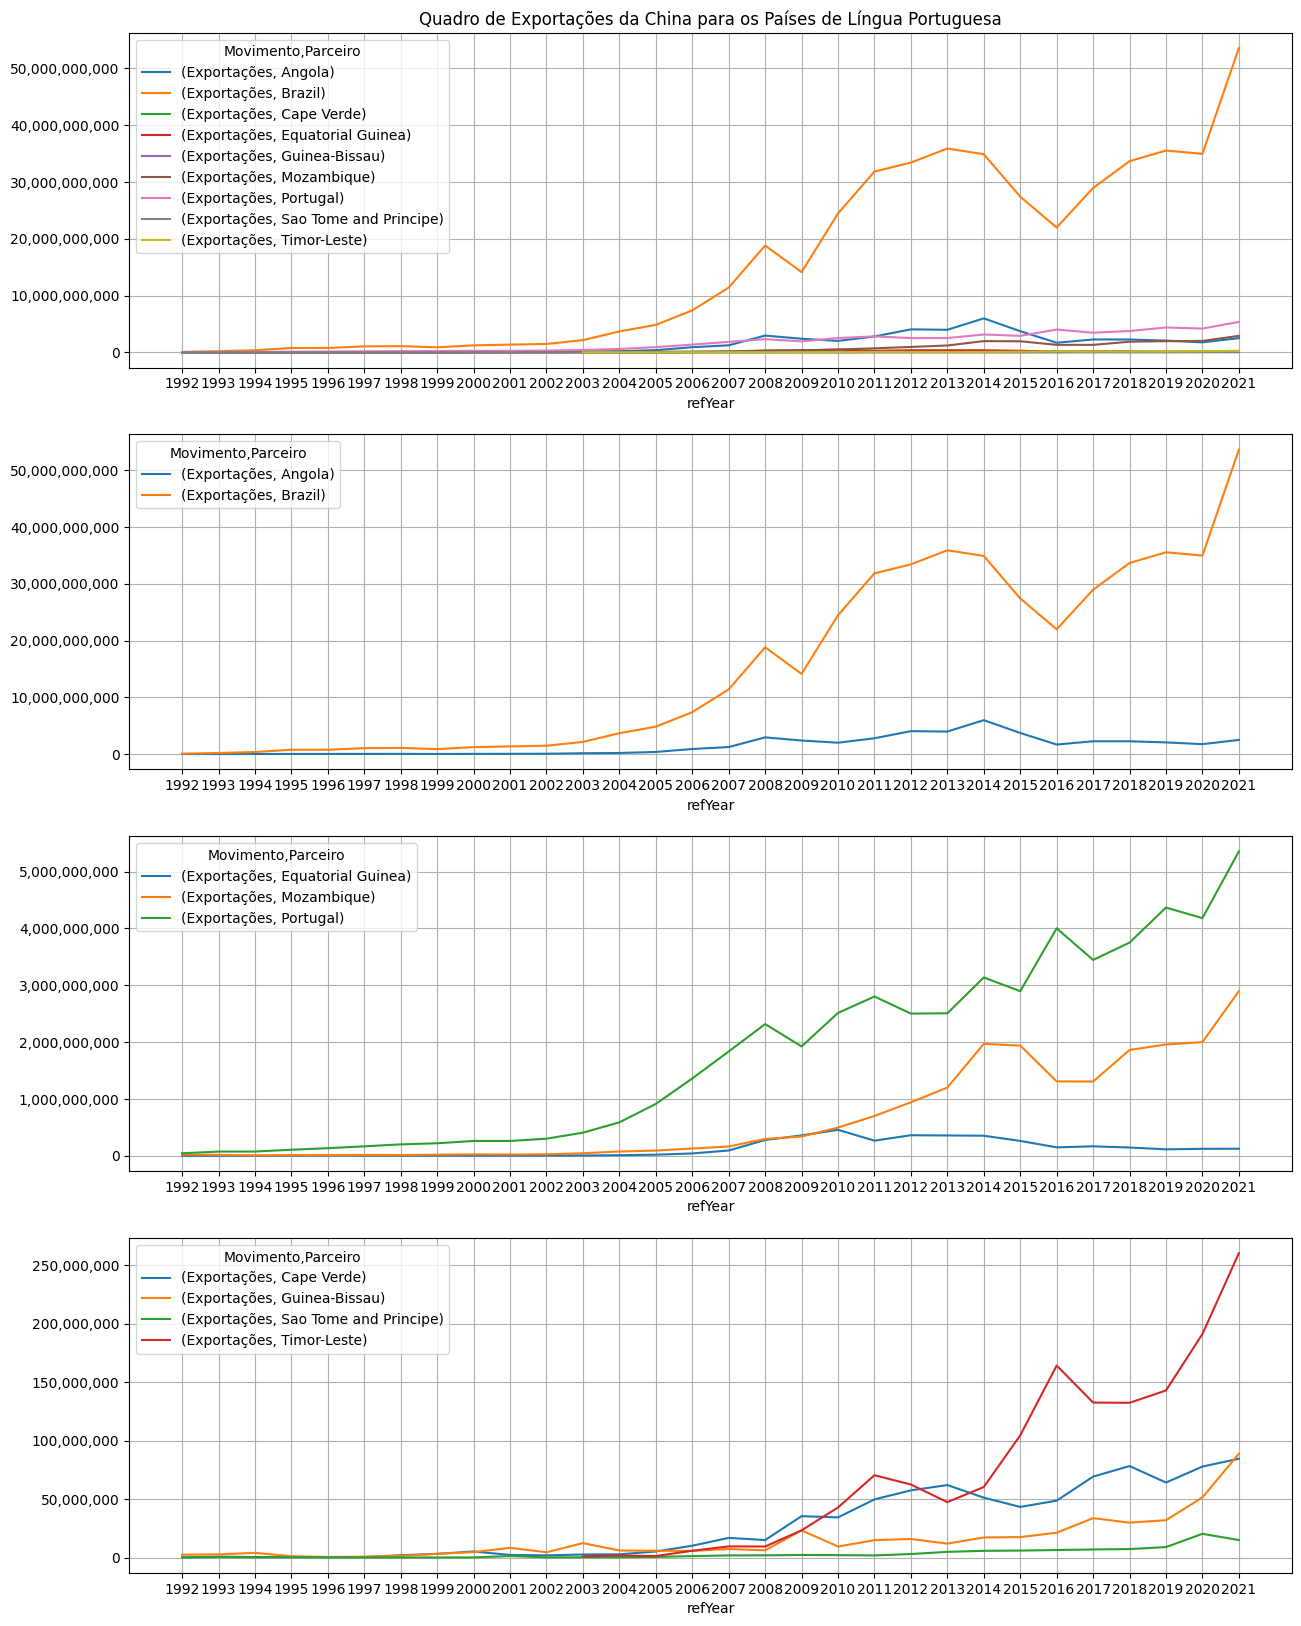

In [21]:
title=f"Quadro de {movimento} da {m49_reporter_codes_map[m49_china]} para os Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cape Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"downloads/cn_plp_{movimento}.png")

### Gráficos saldo (China: exportações-importações)

In [22]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Saldo' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento              Saldo                                   \
Parceiro              Angola             Brazil    Cape Verde   
refYear                                                         
1992          -20,936,357.00    -454,550,331.00           NaN   
1993         -169,503,514.00    -670,901,297.00           NaN   
1994          -35,502,319.00    -696,386,415.00           NaN   
1995         -115,747,966.00    -472,471,380.00           NaN   
1996         -215,217,438.00    -721,134,642.00           NaN   
1997         -574,367,635.00    -444,572,029.00           NaN   
1998         -117,044,684.00     -47,739,392.00           NaN   
1999         -339,287,459.00     -92,527,459.00           NaN   
2000       -1,808,957,458.00    -397,895,296.00           NaN   
2001         -676,106,261.00    -996,307,515.00           NaN   
2002       -1,025,738,442.00  -1,536,637,557.00  1,839,107.00   
2003       -2,060,143,665.00  -3,699,035,774.00  2,595,744.00   
2004       -4,523,821,241.00  -4,998,757,110.00           NaN   
2005       -6,209,034,768.00  -5,165,314,721.00           NaN   
2006      -10,039,109,474.00  -5,529,389,430.00 10,093,746.00   
2007      -11,654,145,952.00  -6,943,598,580.00 16,826,438.00   
2008      -19,440,054,073.00 -11,055,985,339.00           NaN   
2009      -12,289,870,694.00 -14,162,464,249.00 35,404,839.00   
2010      -20,811,176,878.00 -13,638,795,485.00 34,323,033.00   
2011      -22,138,027,126.00 -20,550,072,955.00 49,739,623.00   
2012      -29,522,725,647.00 -18,867,493,429.00 57,489,358.00   
2013      -28,008,610,414.00 -18,403,651,409.00 61,995,934.00   
2014      -25,131,018,227.00 -16,763,090,404.00 51,220,417.00   
2015      -12,284,465,500.00 -16,677,132,636.00 43,277,589.00   
2016      -12,285,718,456.00 -23,878,894,481.00 48,588,157.00   
2017      -18,441,256,242.00 -29,906,617,038.00 69,231,860.00   
2018      -23,573,373,248.00 -43,904,360,798.00 77,975,354.00   
2019      -21,781,674,725.00 -44,423,483,135.00 64,138,300.00   
2020      -13,009,638,134.00 -50,563,981,695.00 76,626,687.00   
2021      -18,416,685,636.00 -56,265,651,888.00 83,390,817.00   

Movimento                                                                     \
Parceiro  Equatorial Guinea  Guinea-Bissau       Mozambique         Portugal   
refYear                                                                        
1992             100,781.00            NaN   -17,660,834.00    21,073,084.00   
1993             607,393.00   1,665,178.00     9,830,673.00    35,524,741.00   
1994             487,135.00   3,091,625.00       942,187.00    58,967,002.00   
1995         -10,302,866.00   1,087,678.00    10,430,094.00    67,420,270.00   
1996          -9,630,486.00            NaN    11,037,019.00   103,139,333.00   
1997         -74,152,647.00    -316,354.00    15,211,430.00   121,482,904.00   
1998         -65,970,703.00            NaN    12,906,684.00   173,637,420.00   
1999        -164,603,711.00   2,985,627.00    15,631,670.00   181,654,579.00   
2000        -315,928,914.00   4,439,701.00    15,928,262.00   213,874,459.00   
2001        -505,226,377.00            NaN    10,847,163.00   189,107,863.00   
2002        -379,438,416.00            NaN     3,353,757.00   218,174,120.00   
2003        -406,838,510.00            NaN    18,436,521.00   211,642,721.00   
2004        -986,525,186.00   5,965,053.00    30,868,208.00   307,362,629.00   
2005      -1,419,032,543.00            NaN    17,950,550.00   588,118,240.00   
2006      -2,496,483,676.00   5,676,992.00    48,168,135.00 1,005,855,077.00   
2007      -1,604,492,544.00   7,135,829.00    39,304,871.00 1,450,109,864.00   
2008      -1,990,480,978.00   4,904,436.00   170,112,575.00 1,929,612,429.00   
2009        -696,647,653.00  21,576,461.00   161,579,441.00 1,442,586,354.00   
2010        -142,415,784.00   5,570,830.00   295,313,507.00 1,758,891,674.00   
2011      -1,406,630,326.00  10,738,246.00   443,005,827.00 1,639,369,807.00   
2012      -1,4

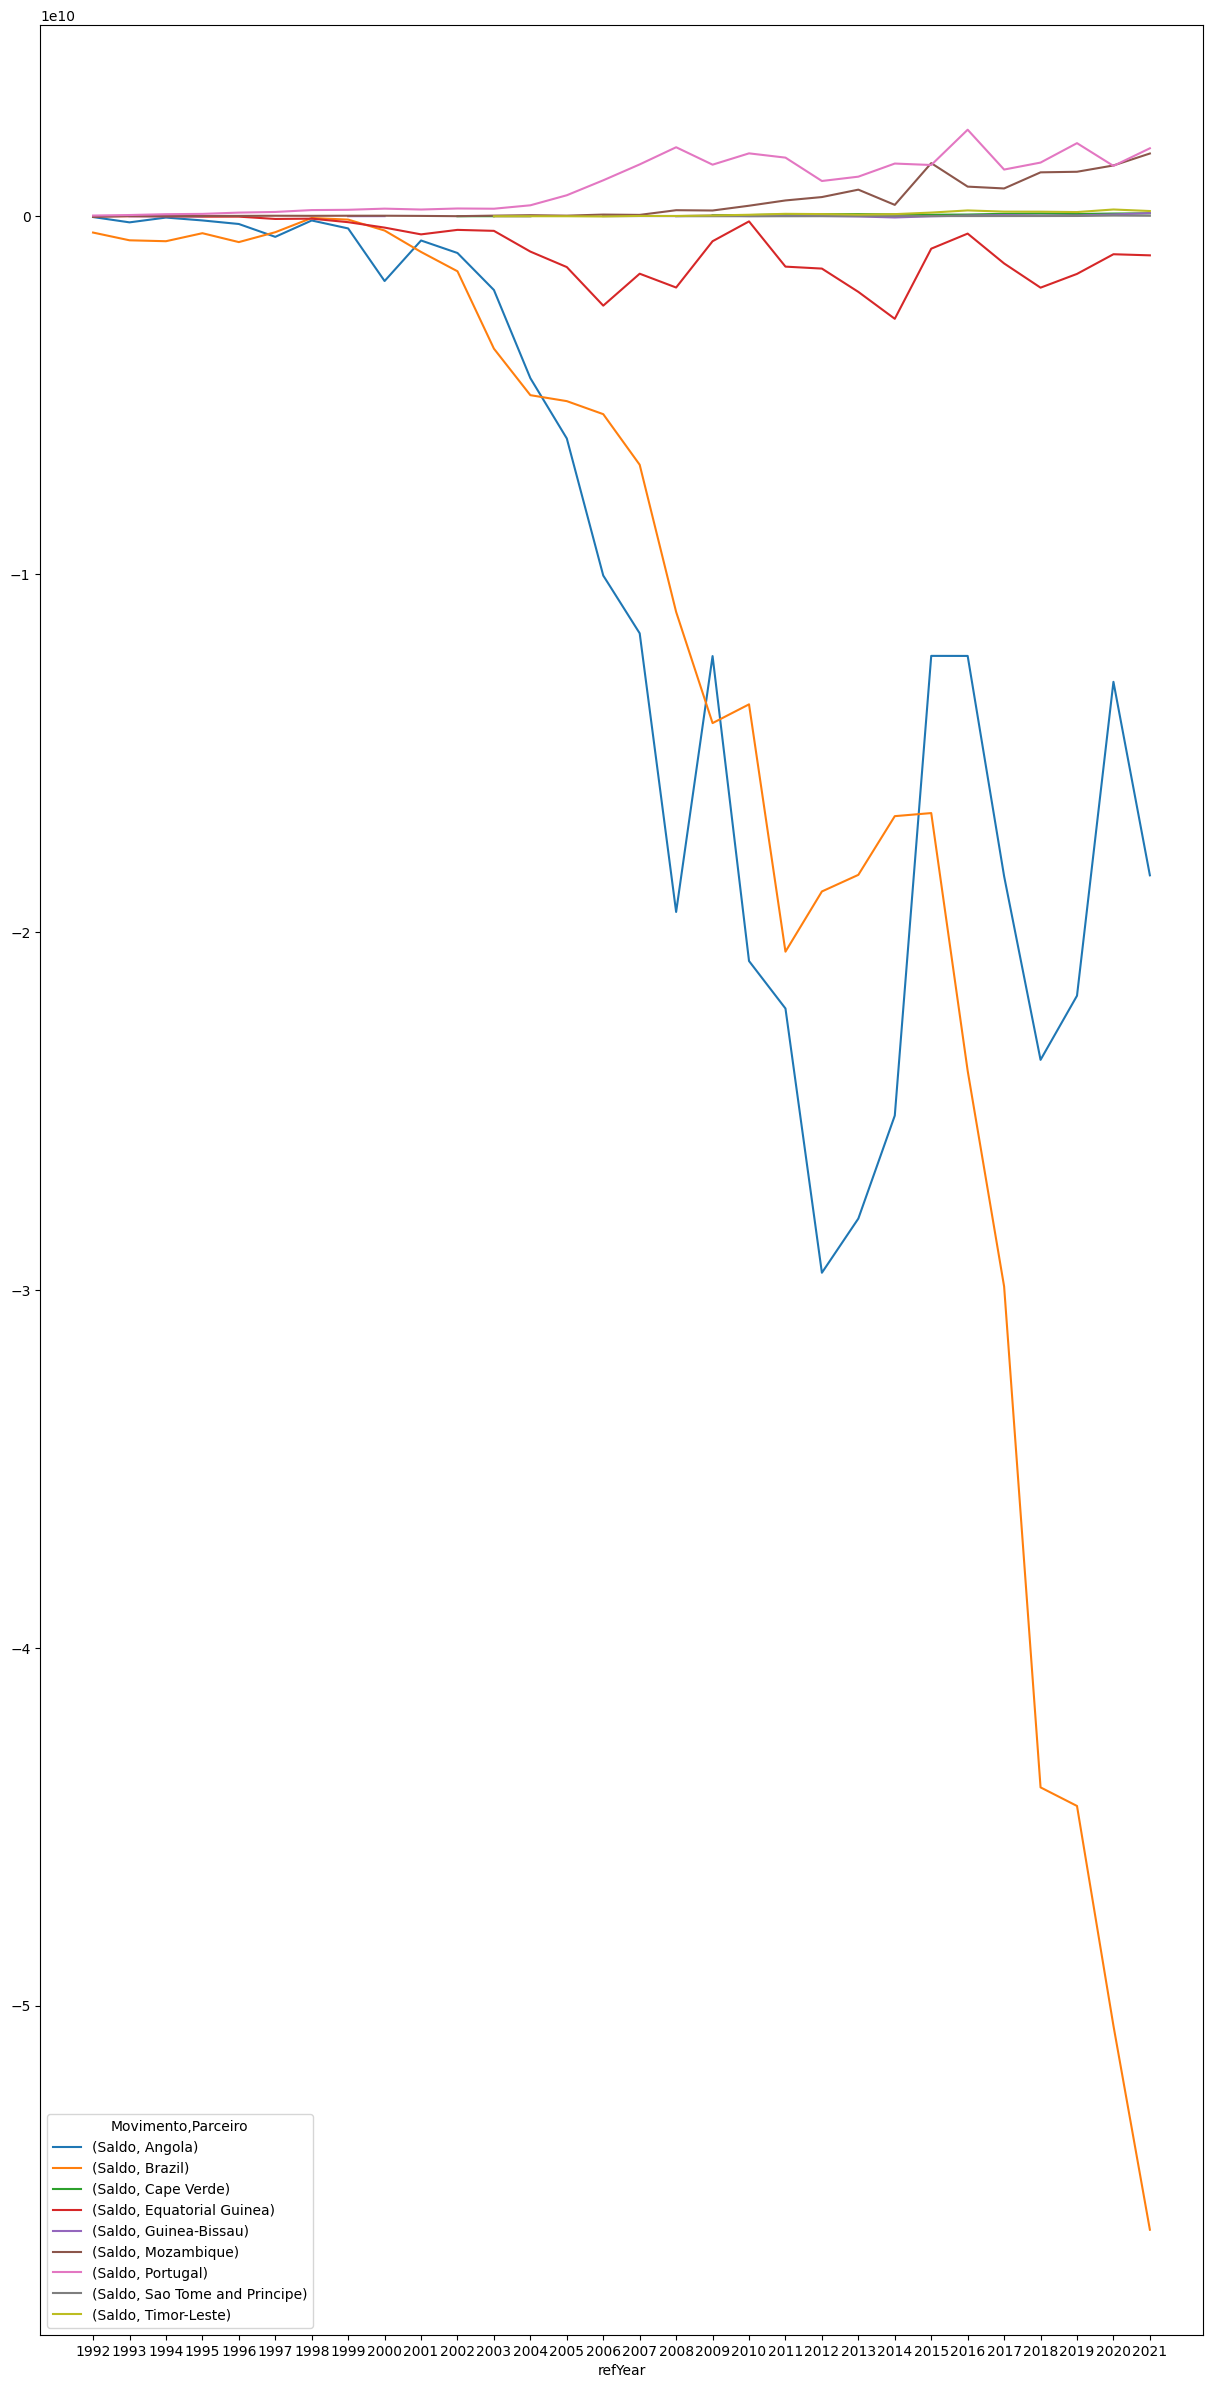

In [23]:
import matplotlib.pyplot as plt
graph_data.plot.line(figsize=(15,30),xticks=graph_data.index.values)
plt.savefig(f"downloads/cn_plp_{movimento}.png")

## China, categorias de produtos mais importantes nas trocas com os PLP

Obtem os totais agregados com nível 2 de código HS e lista os primeiros

In [24]:
import comtrade


rank_filter = 5  # número de importações mais relevantes
years = "2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021"
flowCode = 'M,X'
pco_cols = ['reporterDesc','partnerDesc','refYear','rank','cmdCode','cmdDesc',
            'flowCode','primaryValue']
df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flowCode,
                     cmdCode="AG2",
                     reporterCode=m49_china,
                     partnerCode=m49_plp_list,
                     period=years,
                     timeout=120
                     )

pco = df.sort_values(['partnerDesc','refYear','primaryValue'], ascending=[True,True,False])
pco['rank'] = pco.groupby(['partnerDesc','refYear','flowCode'])["primaryValue"].rank(method="dense", ascending=False)
# convert rank column to int
pco['rank'] = pco['rank'].astype(int)

pco_top5 = pco[pco['rank'] <= rank_filter]
cmdCodes_top5 = pco_top5['cmdCode'].unique()
print(f"Categorias de produtos envolvidas: {cmdCodes_top5}")
# save to Excel
pco_top5_sorted = pco_top5[pco_cols].set_index(['reporterDesc','partnerDesc','refYear','flowCode','rank']).sort_index()

# Prepare file name for Excel output
filename_note=f"{years.replace(',','_')}_{flowCode.replace(',','_')}"  # change to append to filename
excel_file_name = f"./downloads/china_plp_top5_{filename_note}.xlsx"
excel_file = pd.ExcelWriter(excel_file_name)
# Save data
pco_top5_sorted.to_excel(excel_file, sheet_name="comtrade", startrow=2)
excel_file.close()
# Write title in first row TBD
excel_file_title = f"Trocas Comerciais China-PLP, top {rank_filter} produtos (M=Importações, X=Exportações), {years}, valores USD"
print(excel_file_title)
print("Guardado em:",excel_file_name)

# show
pd.options.display.max_colwidth=100
pd.options.display.float_format = '{:,.2f}'.format
pco_top5_sorted

Categorias de produtos envolvidas: ['27' '64' '07' '85' '62' '34' '44' '73' '39' '63' '03' '25' '88' '52'
 '16' '83' '87' '84' '71' '20' '90' '40' '72' '74' '76' '94' '68' '22'
 '01' '26' '12' '47' '29' '24' '15' '54' '41' '17' '02' '89' '61' '82'
 '95' '55' '10' '70' '60' '09' '69' '99' '92' '49' '38' '30' '58' '48'
 '65' '97' '33' '56' '08' '04' '21' '96' '28' '31' '86' '42' '45' '91'
 '32' '06' '14' '78']
Trocas Comerciais China-PLP, top 5 produtos (M=Importações, X=Exportações), 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021, valores USD
Guardado em: ./downloads/china_plp_top5_2000_2001_2002_2003_2004_2005_2006_2007_2008_2009_2010_2011_2012_2013_2014_2015_2016_2017_2018_2019_2020_2021_M_X.xlsx


cmdCode  \
reporterDesc partnerDesc refYear flowCode rank           
China        Angola      2000    M        1         27   
                                          2         44   
                                          3         73   
                                          4         39   
                                          5         85   
...                                                ...   
             Timor-Leste 2021    X        1         73   
                                          2         72   
                                          3         39   
                                          4         85   
                                          5         27   

                                                                                                                                            cmdDesc  \
reporterDesc partnerDesc refYear flowCode rank                                                                                                        
China        Angola      2000    M        1     Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral w...   
                                          2                                                                Wood and articles of wood; wood charcoal   
                                          3                                                                                  Iron or steel articles   
                                          4                                                                           Plastics and articles thereof   
                                          5     Electrical machinery and equipment and parts thereof; sound recorders and reproducers; televisio...   
...                                                                                                                                             ...   
             Timor-Leste 2021    X        1                                                                                  Iron or steel articles   
                                          2                                                                                          Iron and steel   
                                          3                                                                           Plastics and articles thereof   
                                          4     Electrical machinery and equipment and parts thereof; sound recorders and reproducers; televisio...   
                                          5     Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral w...   

                                                   primaryValue  
reporterDesc partnerDesc refYear flowCode rank                   
China        Angola      2000    M        1    1,842,016,530.00  
                                          2          671,664.00  
                                          3            4,055.00  
                                          4              600.00  
                                          5               82.00  
...                                                         ...  
             Timor-Leste 2021    X        1       46,230,023.00  
                                          2       22,874,181.00  
                                          3       17,001,590.00  
                                          4       16,813,847.00  
                                          5       16,094,958.00  

[1733 rows x 3 columns]

## China, detalhe das exportações mais importantes dos PLP para a China

Em dois passos: 
* obtém as categorias de nível 2 mais importantes de cada país
* pesquisa todos as subcategorias de cada

In [25]:
rank_filter = 5  # número de importações mais relevantes
years = "2021"
partnerCode = m49_angola # 
flowCode="M"

In [27]:
import comtrade
from comtrade import COUNTRY_CODES, HS_CODES, HS_CODES_DF, HS_CODES_L2_DF
pco_cols = ['reporterDesc','partnerDesc','refYear','rank','cmdDesc',
            'flowCode','primaryValueFormated']

pco_cols_detail = ['reporterDesc','partnerDesc','refYear','cmdCode','cmdDesc',
            'flowCode','primaryValue', 'isAggregate']

# first we collect the top commodity level 2 codes            
df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flowCode,
                     cmdCode="AG2",
                     reporterCode=m49_china,
                     partnerCode=partnerCode,
                     period=years,
                     timeout=30,
                     echo_url=True
                     )

pco = df.sort_values(['partnerDesc','refYear','primaryValue'], ascending=[True,True,False])
pco['rank'] = pco.groupby(['partnerDesc','refYear'])["primaryValue"].rank(method="dense", ascending=False)
pco_top5 = pco[pco['rank'] <= rank_filter]
# get the countries
countries = pco_top5.partnerDesc.unique()
country_cmd_top5_codes = dict()

# get the detailed commodity codes for the top of each country
for country in countries:
    l2_codes = pco_top5[pco_top5.partnerDesc == country]['cmdCode'].unique()
    print(country,l2_codes)
    hs_details = []
    for l2_code in l2_codes:
        l2_sub_codes = list(HS_CODES_DF[HS_CODES_DF.hscode.str.startswith(l2_code)]['hscode'])
        hs_details = hs_details + l2_sub_codes
    # print(hs_details)
    country_cmd_top5_codes[country] = hs_details.copy()

# now we fetch the detail
countryDesc = COUNTRY_CODES[partnerCode]
country_cmd_codes = ",".join(country_cmd_top5_codes[countryDesc])
# print(country_cmd_codes)

df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flowCode,
                     cmdCode=country_cmd_codes, # sometimes the detail commodity codes generates errors
                     reporterCode=m49_china,
                     partnerCode=partnerCode,
                     partner2Code=0,
                     period=years,
                     echo_url=True,
                     timeout=60
                     )
df[pco_cols_detail].sort_values('primaryValue',ascending=False).to_excel(f"./downloads/china_plp_{years}_{flowCode}_detail_{countryDesc}.xlsx")
print("Mostrando o top 100 geral")
df[df.isAggregate == False][pco_cols_detail].sort_values('primaryValue',ascending=False).head(100)

https://comtradeapi.un.org/data/v1/get//C/A/HS?reporterCode=156&period=2021&partnerCode=24&partner2Code=0&cmdCode=AG2&flowCode=M&customsCode=C00&subscription-key=HIDDEN
Angola ['27' '25' '26' '74' '76']
https://comtradeapi.un.org/data/v1/get//C/A/HS?reporterCode=156&period=2021&partnerCode=24&partner2Code=0&cmdCode=27%2C2701%2C270111%2C270112%2C270119%2C270120%2C2702%2C270210%2C270220%2C2703%2C270300%2C2704%2C270400%2C2705%2C270500%2C2706%2C270600%2C2707%2C270710%2C270720%2C270730%2C270740%2C270750%2C270791%2C270799%2C2708%2C270810%2C270820%2C2709%2C270900%2C2710%2C271012%2C271019%2C271020%2C271091%2C271099%2C2711%2C271111%2C271112%2C271113%2C271114%2C271119%2C271121%2C271129%2C2712%2C271210%2C271220%2C271290%2C2713%2C271311%2C271312%2C271320%2C271390%2C2714%2C271410%2C271490%2C2715%2C271500%2C2716%2C271600%2C25%2C2501%2C250100%2C2502%2C250200%2C2503%2C250300%2C2504%2C250410%2C250490%2C2505%2C250510%2C250590%2C2506%2C250610%2C250620%2C2507%2C250700%2C2508%2C250810%2C250830%2C250840%2C2

,reporterDesc,partnerDesc,refYear,cmdCode,cmdDesc,flowCode,primaryValue,isAggregate
25,China,Angola,2021,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",M,"19,855,580,399.00",False
28,China,Angola,2021,271112,"Petroleum gases and other gaseous hydrocarbons; liquefied, propane",M,"423,920,134.00",False
27,China,Angola,2021,271111,"Petroleum gases and other gaseous hydrocarbons; liquefied, natural gas",M,"305,044,314.00",False
31,China,Angola,2021,271500,"Bituminous mixtures based on natural asphalt, on natural bitumen, on petroleum bitumen, on miner...",M,"200,515,472.00",False
29,China,Angola,2021,271113,"Petroleum gases and other gaseous hydrocarbons; liquefied, butanes",M,"38,813,644.00",False
10,China,Angola,2021,251612,"Granite; merely cut, by sawing or otherwise, into blocks or slabs of a rectangular (including sq...",M,"16,997,045.00",False
34,China,Angola,2021,740312,"Copper; refined, unwrought, wire-bars",M,"13,144,124.00",False
9,China,Angola,2021,251611,Granite; crude or roughly trimmed,M,"12,720,535.00",False
18,China,Angola,2021,260200,"Manganese ores and concentrates, including ferruginous manganese ores and concentrates with a ma...",M,"11,704,627.00",False
43,China,Angola,2021,760120,"Aluminium; unwrought, alloys",M,"9,887,820.00",False


## Países de consignação

### Partner2

O `partner2` é uma novidade dos dados comtrade. Procura registar o país de "consignação".

No caso das importações é o país que despachou os bens para o país que importa,
sem que tenha ocorrido entre o país de origem (_partner_) nenhuma transação
que modifique o estatuto legal (denominação de origem?) dos bens:

> The country of consignment in the case of imports is the country from which goods
 were dispatched to the importing country, without any commercial transactions 
 or other operations that change the legal status of the goods taking 
 place in any intermediate country.


#### Resultados quand o partner2Code não é especificado na pesquisa



Se a pesquisa não especifica partner2Code, alguns anos produzem mais do que uma linha por par _reporter/partner_  
com diferentes valores. Por exemplo, se a China for o `reporter` e a Guiné Equatorial o `partner` nos anos 2015, 2016, 2017 aparece::
* Uma linha por `partner2Code`, incluindo uma linha em que o `partner2` é igual ao `partner` (importações diretas).
* Uma linha adicional com `partner2Code` igual a zero que contém o total agregado das outras linhas com `partner2Code` explícito.
* Isso significa que existe duplicação do total.
  
|    | reporterDesc   | partnerDesc       |   partner2Code | partner2Desc         |   refYear | cmdCode   | flowCode   | primaryValueFormated   |
|---:|:---------------|:------------------|---------------:|:---------------------|----------:|:----------|:-----------|:-----------------------|
|  3 | China          | Equatorial Guinea |            344 | China, Hong Kong SAR |      2015 | TOTAL     | M          | 59.0                   |
|  1 | China          | Equatorial Guinea |             56 | Belgium              |      2015 | TOTAL     | M          | 2,435.0                |
|  2 | China          | Equatorial Guinea |            226 | Equatorial Guinea    |      2015 | TOTAL     | M          | 1,166,493,970.0        |
|  0 | China          | Equatorial Guinea |              0 | nan                  |      2015 | TOTAL     | M          | 1,166,496,464.0        |


Para evitar isso tem de se chamar a API com partner2Code = 0, para que os resultados de 2015,2016,2017 excluam
a decomposição. Se partner2Code=None as linhas adicionais aparecem.


Exemplo de resultados se o `partner2Code` for None.

Alterar as variáveis seguintes para testar.


In [31]:
period = "2015" ## if freqCode M  use aaaamm
flow = "M"
cmdCode = 'TOTAL'
reporterCode = m49_china
partnerCode = m49_guine_equatorial
# None: total and subtotal per country
# 0: only total
# > 0: only this country code
partner2Code = None

Exemplo como com `partner2Code = None` aparecem linhas
com detalhe de partner linhas de total

In [32]:
import comtrade

partner2Code = None

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

cols_partner2 = ['reporterDesc','partnerDesc','partner2Code','partner2Desc','refYear',
        'flowDesc','primaryValue','cmdCode','qty','qtyUnitCode','qtyUnitAbbr','customsCode']
cols_partner2_qty_weight = ['reporterDesc','partnerDesc','partner2Code','partner2Desc','refYear','cmdDesc',
        'flowCode','primaryValue',
        'qty','qtyUnitCode','qty','isQtyEstimated','altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated',
       'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated',
        'motCode']

df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=reporterCode,
                     partnerCode=partnerCode,
                     partner2Code=partner2Code,
                     cmdCode=cmdCode,
                     customsCode=None,
                     qtyUnitCodeFilter=-1,
                     period=period,
                     timeout=30, echo_url=True
                     )
result = df.sort_values(['partner2Code','primaryValue'], ascending=[True,False])[cols_partner2]
# print(result.to_markdown())
result

https://comtradeapi.un.org/public/v1/preview//C/A/HS?reporterCode=156&period=2015&partnerCode=226&cmdCode=TOTAL&flowCode=M


,reporterDesc,partnerDesc,partner2Code,partner2Desc,refYear,flowDesc,primaryValue,cmdCode,qty,qtyUnitCode,qtyUnitAbbr,customsCode
0,China,Equatorial Guinea,0,World,2015,Import,"1,166,496,464.00",TOTAL,0.00,-1,NaN,C00
1,China,Equatorial Guinea,56,Belgium,2015,Import,"2,435.00",TOTAL,0.00,-1,NaN,C00
2,China,Equatorial Guinea,226,Equatorial Guinea,2015,Import,"1,166,493,970.00",TOTAL,0.00,-1,NaN,C00
3,China,Equatorial Guinea,344,China Hong Kong,2015,Import,59.00,TOTAL,0.00,-1,NaN,C00


A função `call_uncomtrade` passou a colocar `partner2Code = 0` quando não especificado,
para evitar o problema.

Neste exemplo não se inclui o parâmetro `partner2Code` e a função coloca a zero para obter o resultado
correcto.

In [33]:
df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=m49_china,
                     partnerCode=partnerCode,
                     cmdCode='TOTAL',
                     period=period,
                     timeout=60,
                     echo_url=True
                     )
result = df.sort_values(['partnerDesc','flowCode'])[cols_partner2]
# print(result.to_markdown())
result

https://comtradeapi.un.org/public/v1/preview//C/A/HS?reporterCode=156&period=2015&partnerCode=226&partner2Code=0&cmdCode=TOTAL&flowCode=M&customsCode=C00


,reporterDesc,partnerDesc,partner2Code,partner2Desc,refYear,flowDesc,primaryValue,cmdCode,qty,qtyUnitCode,qtyUnitAbbr,customsCode
0,China,Equatorial Guinea,0,World,2015,Import,"1,166,496,464.00",TOTAL,0.00,-1,NaN,C00


#### Cobertura de informação sobre parter2

Não parece ser possível obter as informações referentes a partner2
 senão nos anos 2015-2017, quando o `reporter` é a China.

In [37]:
yrange = comtrade.year_range(2014,2023) 
reporterCode = m49_china


In [38]:

df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=reporterCode,
                     partnerCode=partnerCode,
                     partner2Code=None,
                     cmdCode='TOTAL',
                     period=yrange,
                     timeout=10,
                     echo_url=True
                     )
result = df.sort_values(['partnerDesc','refYear','flowCode'])[cols_partner2]
# print(result.to_markdown())
result

https://comtradeapi.un.org/public/v1/preview//C/A/HS?reporterCode=156&period=2014%2C2015%2C2016%2C2017%2C2018%2C2019%2C2020%2C2021%2C2022&partnerCode=226&cmdCode=TOTAL&flowCode=M&customsCode=C00


,reporterDesc,partnerDesc,partner2Code,partner2Desc,refYear,flowDesc,primaryValue,cmdCode,qty,qtyUnitCode,qtyUnitAbbr,customsCode
0,China,Equatorial Guinea,0,World,2014,Import,"3,217,190,248.00",TOTAL,NaN,-1,NaN,C00
1,China,Equatorial Guinea,0,World,2015,Import,"1,166,496,464.00",TOTAL,0.00,-1,NaN,C00
2,China,Equatorial Guinea,56,Belgium,2015,Import,"2,435.00",TOTAL,0.00,-1,NaN,C00
3,China,Equatorial Guinea,226,Equatorial Guinea,2015,Import,"1,166,493,970.00",TOTAL,0.00,-1,NaN,C00
4,China,Equatorial Guinea,344,China Hong Kong,2015,Import,59.00,TOTAL,0.00,-1,NaN,C00
5,China,Equatorial Guinea,0,World,2016,Import,"631,851,506.00",TOTAL,0.00,-1,NaN,C00
6,China,Equatorial Guinea,24,Angola,2016,Import,"396,344.00",TOTAL,0.00,-1,NaN,C00
7,China,Equatorial Guinea,178,Congo,2016,Import,"1,457,849.00",TOTAL,0.00,-1,NaN,C00
8,China,Equatorial Guinea,226,Equatorial Guinea,2016,Import,"589,959,003.00",TOTAL,0.00,-1,NaN,C00
9,China,Equatorial Guinea,251,France and Monaco,2016,Import,"1,341.00",TOTAL,0.00,-1,NaN,C00


Mas outros países incluem esses dados em outros anos, por exemplo, Portugal

In [40]:
cmdCode = 'TOTAL'

period = "2018" ## if freqCode M  use aaaamm
flow = "X"
reporterCode=m49_portugal
partnerCode = m49_brazil
cmdCode='TOTAL'

df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=reporterCode,
                     partnerCode=partnerCode,
                     partner2Code=None,
                     cmdCode=cmdCode,
                     customsCode=None,
                     period=period,
                     timeout=None,
                     echo_url=True
                     )
interesting_cols = [col for col in df.columns if len(df[col].unique())>1]
print(interesting_cols)
show_cols = cols_partner2 + list(set(interesting_cols)-set(cols_partner2))
result = df.sort_values(['partner2Code','flowCode'])[show_cols]

# print(result.to_markdown())
result

https://comtradeapi.un.org/public/v1/preview//C/A/HS?reporterCode=620&period=2018&partnerCode=76&cmdCode=TOTAL&flowCode=X
['partner2Code', 'partner2Desc', 'motCode', 'motDesc', 'isNetWgtEstimated', 'fobvalue', 'primaryValue', 'primaryValueFormated']


,reporterDesc,partnerDesc,partner2Code,partner2Desc,refYear,flowDesc,primaryValue,cmdCode,qty,qtyUnitCode,qtyUnitAbbr,customsCode,fobvalue,motCode,motDesc,isNetWgtEstimated,primaryValueFormated
0,Portugal,Brazil,0,World,2018,Export,"1,083,984,874.36",TOTAL,0.00,-1,NaN,C00,"1,083,984,874.36",0,All modes of transport,True,"1,083,984,874.361"
1,Portugal,Brazil,0,World,2018,Export,"52,669,113.05",TOTAL,0.00,-1,NaN,C00,"52,669,113.05",1000,Air,True,"52,669,113.046"
2,Portugal,Brazil,0,World,2018,Export,"1,027,354,167.57",TOTAL,0.00,-1,NaN,C00,"1,027,354,167.57",2100,Sea,True,"1,027,354,167.565"
3,Portugal,Brazil,0,World,2018,Export,"3,801,817.75",TOTAL,0.00,-1,NaN,C00,"3,801,817.75",3200,Road,True,"3,801,817.747"
4,Portugal,Brazil,0,World,2018,Export,"159,776.00",TOTAL,0.00,-1,NaN,C00,"159,776.00",9200,"Postal consignments, mail or courier shipment",True,"159,776.003"
5,Portugal,Brazil,251,France and Monaco,2018,Export,"56,538.91",TOTAL,0.00,-1,NaN,C00,"56,538.91",0,All modes of transport,False,"56,538.906"
6,Portugal,Brazil,251,France and Monaco,2018,Export,"56,538.91",TOTAL,0.00,-1,NaN,C00,"56,538.91",1000,Air,False,"56,538.906"
7,Portugal,Brazil,276,Germany,2018,Export,"18,143.93",TOTAL,0.00,-1,NaN,C00,"18,143.93",0,All modes of transport,False,"18,143.928"
8,Portugal,Brazil,276,Germany,2018,Export,"16,982.24",TOTAL,0.00,-1,NaN,C00,"16,982.24",1000,Air,False,"16,982.235"
9,Portugal,Brazil,276,Germany,2018,Export,"1,161.69",TOTAL,0.00,-1,NaN,C00,"1,161.69",2100,Sea,False,"1,161.694"


Note-se a duplicação de linhas para o mesmo terceto _reporterCode-partnerCode-partner2Code_

Essa duplicação deve-se a desdobramento `motCode` (_mode of transport_) e `partner2Code`. Se filtrarmos só por motCode == 0 
e partner2Code != 0 obtemos a lista de combinações reporter-partner-partner2 para todos os modos de tranporte, sem
valores agregados por partner.

In [41]:
result[(result.motCode==0)&(result.partner2Code != 0)][list(set(['refYear','reporterDesc','partnerDesc',]+interesting_cols))]

,fobvalue,refYear,primaryValue,motCode,motDesc,isNetWgtEstimated,reporterDesc,primaryValueFormated,partner2Desc,partnerDesc,partner2Code
5,"56,538.91",2018,"56,538.91",0,All modes of transport,False,Portugal,"56,538.906",France and Monaco,Brazil,251
7,"18,143.93",2018,"18,143.93",0,All modes of transport,False,Portugal,"18,143.928",Germany,Brazil,276
10,"235,517.71",2018,"235,517.71",0,All modes of transport,False,Portugal,"235,517.715",Greece,Brazil,300
12,"50,945.52",2018,"50,945.52",0,All modes of transport,False,Portugal,"50,945.523",Italy,Brazil,380
14,"15,883.18",2018,"15,883.18",0,All modes of transport,False,Portugal,"15,883.176",Netherlands,Brazil,528
16,"26,405.78",2018,"26,405.78",0,All modes of transport,False,Portugal,"26,405.78",Romania,Brazil,642
18,"16,145,881.59",2018,"16,145,881.59",0,All modes of transport,True,Portugal,"16,145,881.586",Spain,Brazil,724
21,"1,626.13",2018,"1,626.13",0,All modes of transport,False,Portugal,"1,626.135",United Kingdom,Brazil,826
23,"1,067,433,931.61",2018,"1,067,433,931.61",0,All modes of transport,True,Portugal,"1,067,433,931.612","Areas, not elsewhere specified",Brazil,899


Gravar em Excel (nome do ficheiro automaticamente reflecte o valor das variáveis relevantes)

In [42]:
result.to_excel(f"./downloads/partner2_{m49_reporter_codes_map[reporterCode]}_{m49_reporter_codes_map[partnerCode]}_{flow}_{period}.xlsx")

## Testes



In [45]:
import comtrade

period = "2016" ## if freqCode M  use aaaamm
flow = "M,X"
cmdCode = 'TOTAL'
reporterCode = m49_portugal
partnerCode = m49_angola

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '${:,.2f}'.format

cols_partner2 = ['reporterDesc','partnerDesc','partner2Code','partner2Desc','refYear',
        'flowCode','qtyUnitCode','primaryValue','isAggregate']
cols_partner2_qty_weight = ['reporterDesc','partnerDesc','partner2Code','partner2Desc','refYear','cmdDesc',
        'flowCode','primaryValue',
        'qtyUnitCode','qty','isQtyEstimated','altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated',
       'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated',
        'motCode']


df = comtrade.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flow,
                     reporterCode=reporterCode,
                     partnerCode=partnerCode,
                     partner2Code=None,
                     cmdCode=cmdCode,
                     more_pars={'customsCode':None},
                     period=period,
                     timeout=30, echo_url=True
                     )

interesting_cols = [col for col in df.columns if len(df[col].unique())>1]
print(interesting_cols)
show_cols = cols_partner2 +  list(set(interesting_cols)-set(cols_partner2))
result = df.sort_values(['partnerDesc','flowCode'])[show_cols]
result

https://comtradeapi.un.org/public/v1/preview//C/A/HS?reporterCode=620&period=2016&partnerCode=24&cmdCode=TOTAL&flowCode=M%2CX
['flowCode', 'flowDesc', 'partner2Code', 'partner2Desc', 'motCode', 'motDesc', 'isNetWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue', 'primaryValueFormated']


,reporterDesc,partnerDesc,partner2Code,partner2Desc,refYear,flowCode,qtyUnitCode,primaryValue,isAggregate,fobvalue,cifvalue,motCode,motDesc,flowDesc,isNetWgtEstimated,primaryValueFormated
0,Portugal,Angola,0,World,2016,M,-1,"$895,881,332.31",True,NaN,"$895,881,332.31",0,All modes of transport,Import,True,"895,881,332.307"
2,Portugal,Angola,0,World,2016,M,-1,"$1,689,952.90",True,NaN,"$1,689,952.90",1000,Air,Import,True,"1,689,952.899"
4,Portugal,Angola,0,World,2016,M,-1,"$894,117,557.93",True,NaN,"$894,117,557.93",2100,Sea,Import,True,"894,117,557.927"
8,Portugal,Angola,0,World,2016,M,-1,"$1,080.88",True,NaN,"$1,080.88",9200,"Postal consignments, mail or courier shipment",Import,False,"1,080.876"
10,Portugal,Angola,0,World,2016,M,-1,"$72,740.61",True,NaN,"$72,740.61",9300,Self propelled goods,Import,False,"72,740.606"
12,Portugal,Angola,24,Angola,2016,M,-1,"$895,440,525.34",True,NaN,"$895,440,525.34",0,All modes of transport,Import,True,"895,440,525.343"
13,Portugal,Angola,24,Angola,2016,M,-1,"$1,689,952.90",True,NaN,"$1,689,952.90",1000,Air,Import,True,"1,689,952.899"
14,Portugal,Angola,24,Angola,2016,M,-1,"$893,676,750.96",True,NaN,"$893,676,750.96",2100,Sea,Import,True,"893,676,750.962"
15,Portugal,Angola,24,Angola,2016,M,-1,"$1,080.88",True,NaN,"$1,080.88",9200,"Postal consignments, mail or courier shipment",Import,False,"1,080.876"
16,Portugal,Angola,24,Angola,2016,M,-1,"$72,740.61",True,NaN,"$72,740.61",9300,Self propelled goods,Import,False,"72,740.606"
